# TTK Persistence Analysis
#### Nathan Edwards
#### CS 6950 Directed Readings
#### Dr. Steve Petruzza
#### Using dataset 'noisyTerrain.vtu' from TTK 

In [ ]:
#! C:/'Program Files'/TTK-ParaView/bin/pvpython
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

## Different Thresholds 

### Original Data 

In [ ]:
# create a new 'XML Unstructured Grid Reader'
noisyTerrainvtu = XMLUnstructuredGridReader(registrationName='noisyTerrain.vtu', FileName="""'C:\\Users\
atha\\ttk\\ttk-data-1.0.0\
oisyTerrain.vtu'""")
noisyTerrainvtu.PointArrayStatus = ['TextureCoordinates', 'RandomPointScalars', 'Sine', 'DistanceField', 'Blend']

# Properties modified on noisyTerrainvtu
noisyTerrainvtu.PointArrayStatus = []
noisyTerrainvtu.TimeArray = 'None'

UpdatePipeline(time=0.0, proxy=noisyTerrainvtu)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother1 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother1', Input=noisyTerrainvtu)
tTKGeometrySmoother1.InputMaskField = [None, '']

# Properties modified on tTKGeometrySmoother1
tTKGeometrySmoother1.IterationNumber = 3
tTKGeometrySmoother1.InputMaskField = ['POINTS', '']

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother1)

# create a new 'Elevation'
elevation1 = Elevation(registrationName='Elevation1', Input=tTKGeometrySmoother1)
elevation1.LowPoint = [-0.4972916841506958, -0.4972916543483734, -0.16136237978935242]
elevation1.HighPoint = [0.4972916841506958, 0.4972916841506958, 0.22268424928188324]

# Properties modified on elevation1
elevation1.ScalarRange = [0.0, 100.0]
elevation1.LowPoint = [0.0, 1.4901161193847656e-08, -0.16136237978935242]
elevation1.HighPoint = [0.0, 1.4901161193847656e-08, 0.22268424928188324]

UpdatePipeline(time=0.0, proxy=elevation1)

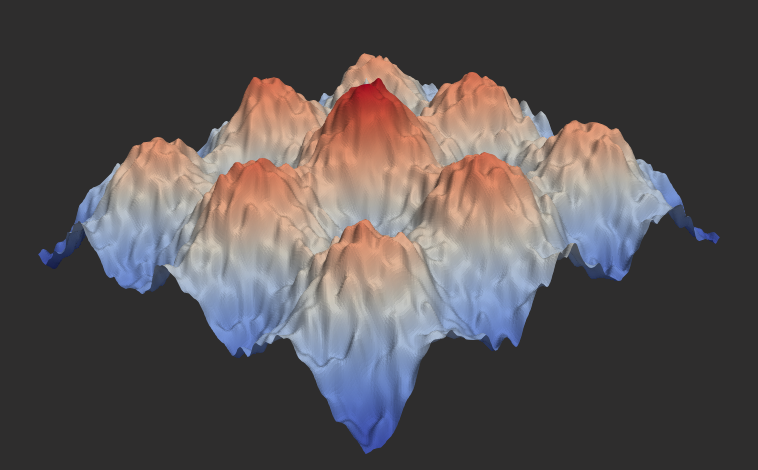

### Persistence Curve of Original Data

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve1 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve1', Input=elevation1)
tTKPersistenceCurve1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# set active source
SetActiveSource(tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

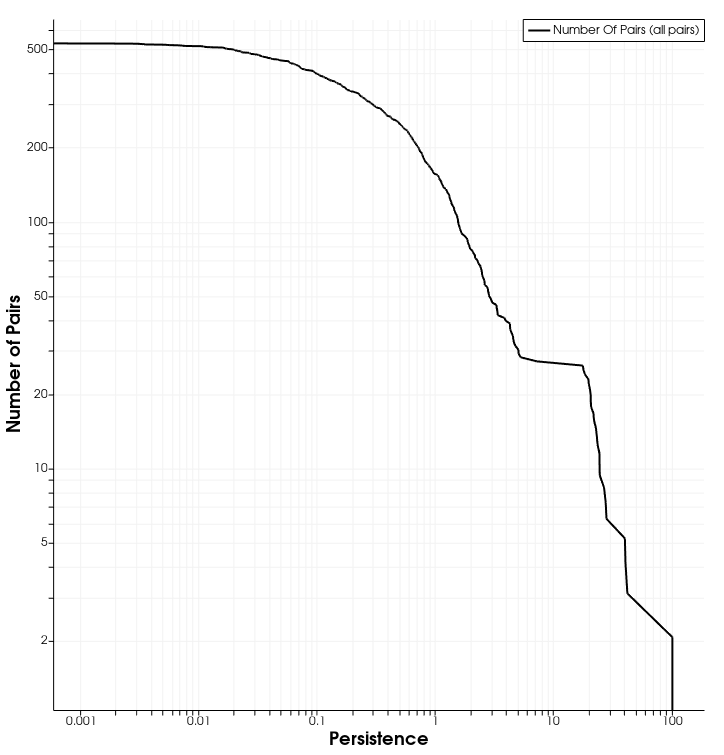

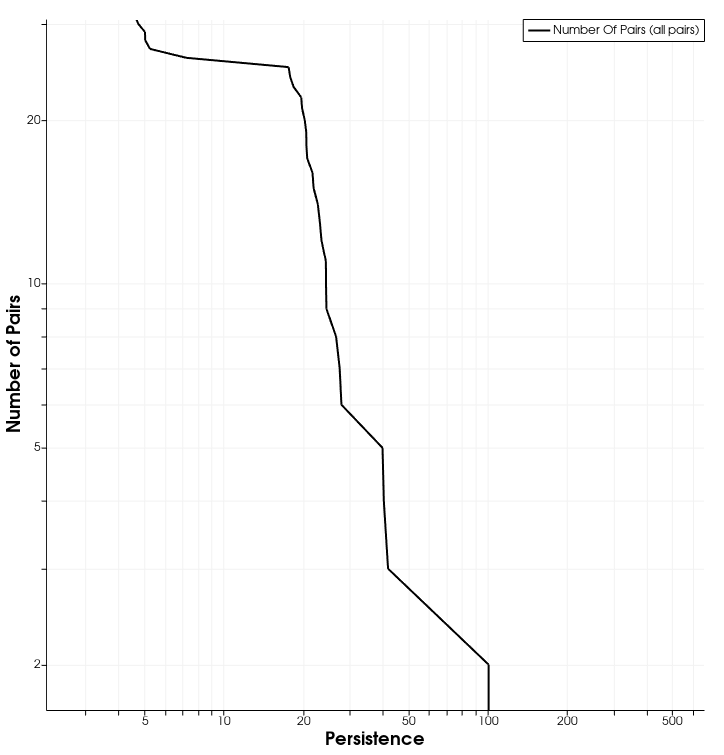

### Persistent Points when Persistence Threshold = 10

In [ ]:
## find source
elevation1 = FindSource('Elevation1')

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram1 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram1', Input=elevation1)
tTKPersistenceDiagram1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold1 = Threshold(registrationName='Threshold1', Input=tTKPersistenceDiagram1)
threshold1.Scalars = ['POINTS', 'CriticalType']
threshold1.UpperThreshold = 3.0

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'PairIdentifier']
threshold1.LowerThreshold = -1.0
threshold1.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold1)

# create a new 'Extract Surface'
extractSurface1 = ExtractSurface(registrationName='ExtractSurface1', Input=threshold1)

UpdatePipeline(time=0.0, proxy=extractSurface1)

# create a new 'Tube'
tube1 = Tube(registrationName='Tube1', Input=extractSurface1)
tube1.Scalars = ['POINTS', 'CriticalType']
tube1.Vectors = ['POINTS', 'Coordinates']
tube1.Radius = 0.9735512542724609

UpdatePipeline(time=0.0, proxy=tube1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram1)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.UpperThreshold = 503.0

UpdatePipeline(time=0.0, proxy=threshold2)

RenameProxy('PersistencePairs', 'sources', threshold2)

# rename source object
RenameSource('PersistencePairs', threshold2)

# create a new 'Threshold'
threshold2_1 = Threshold(registrationName='Threshold2', Input=threshold2)
threshold2_1.Scalars = ['POINTS', 'CriticalType']
threshold2_1.UpperThreshold = 3.0

# Properties modified on threshold2_1
threshold2_1.Scalars = ['CELLS', 'Persistence']
threshold2_1.LowerThreshold = 10.0
threshold2_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold2_1)

RenameProxy('PersistenceThreshold', 'sources', threshold2_1)

# rename source object
RenameSource('PersistenceThreshold', threshold2_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints1 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints1', Input=threshold2_1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 2.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints1)

# set active source
SetActiveSource(threshold2_1)

# create a new 'Extract Surface'
extractSurface2 = ExtractSurface(registrationName='ExtractSurface2', Input=threshold2_1)

UpdatePipeline(time=0.0, proxy=extractSurface2)

# create a new 'Tube'
tube2 = Tube(registrationName='Tube2', Input=extractSurface2)
tube2.Scalars = ['POINTS', 'CriticalType']
tube2.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube2)

# set active source
SetActiveSource(elevation1)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification1 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification1', Domain=elevation1,
    Constraints=threshold2_1)
tTKTopologicalSimplification1.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints1 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints1', Input=tTKTopologicalSimplification1)
tTKScalarFieldCriticalPoints1.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints2 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints2', Input=tTKScalarFieldCriticalPoints1)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.0125

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.025

# set active source
SetActiveSource(tTKScalarFieldCriticalPoints1)

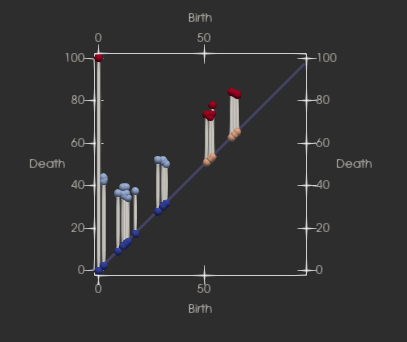

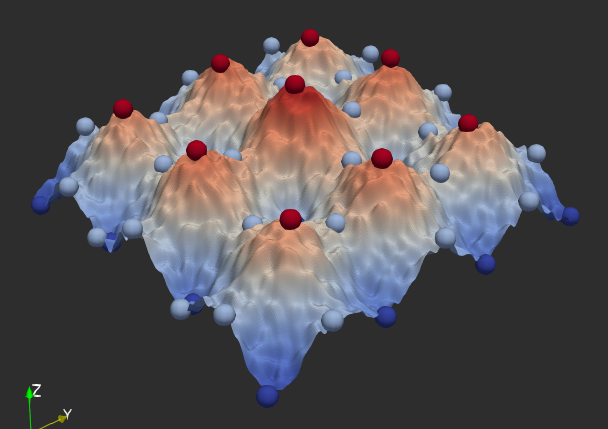

### Persistent Points when Persistence Threshold = 35

In [ ]:
# find source
persistenceThreshold = FindSource('PersistenceThreshold')

# set active source
SetActiveSource(persistenceThreshold)

# find source
elevation1 = FindSource('Elevation1')

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
tube1 = FindSource('Tube1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
persistencePairs = FindSource('PersistencePairs')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# Properties modified on persistenceThreshold
persistenceThreshold.LowerThreshold = 35.0

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
extractSurface1 = FindSource('ExtractSurface1')

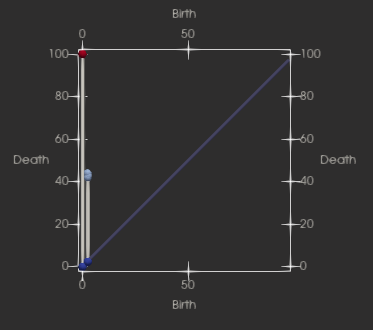

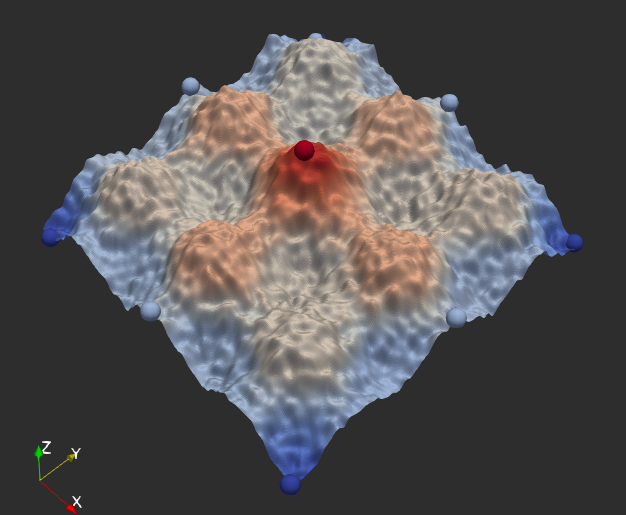

### Persistent Points when Persistence Threshold = 75

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
tube1 = FindSource('Tube1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
persistencePairs = FindSource('PersistencePairs')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# get active source.
persistenceThreshold = GetActiveSource()

# Properties modified on persistenceThreshold
persistenceThreshold.LowerThreshold = 75.0

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# set active source
SetActiveSource(tTKIcospheresFromPoints1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 3.0

# set active source
SetActiveSource(tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.05

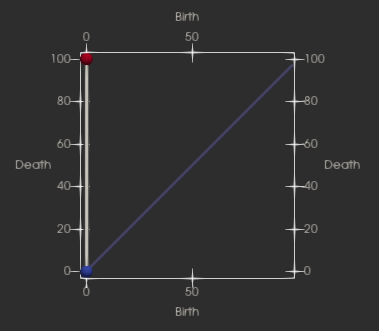

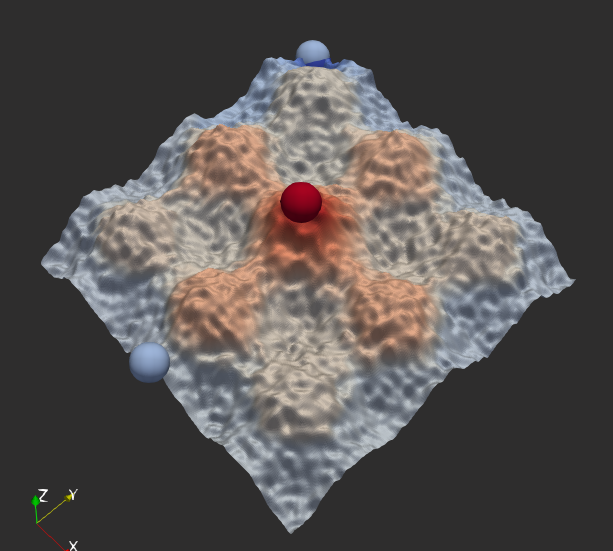

### Persistent Points when Persistence Threshold = 1

In [ ]:
# find source
persistenceThreshold = FindSource('PersistenceThreshold')

# set active source
SetActiveSource(persistenceThreshold)

# find source
elevation1 = FindSource('Elevation1')

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
tube1 = FindSource('Tube1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
persistencePairs = FindSource('PersistencePairs')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# Properties modified on persistenceThreshold
persistenceThreshold.LowerThreshold = 1.0

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# set active source
SetActiveSource(tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.015

# set active source
SetActiveSource(tTKIcospheresFromPoints1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 1.5

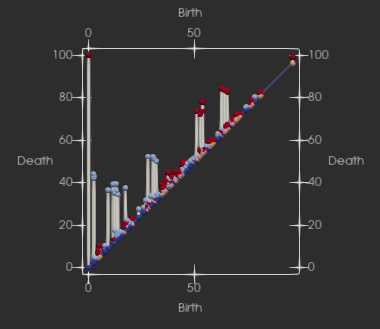

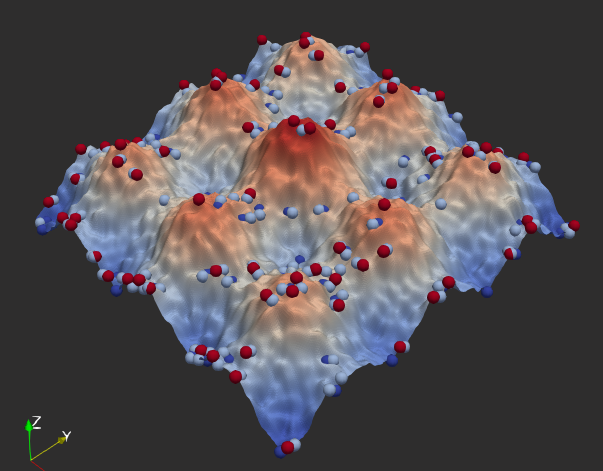

## Split Dataset 

### 1st sub-division (half the data)

In [ ]:
# create a new 'XML Unstructured Grid Reader'
noisyTerrainvtu = XMLUnstructuredGridReader(registrationName='noisyTerrain.vtu', FileName="""'C:\\Users\
atha\\ttk\\ttk-data-1.0.0\
oisyTerrain.vtu'""")
noisyTerrainvtu.PointArrayStatus = ['TextureCoordinates', 'RandomPointScalars', 'Sine', 'DistanceField', 'Blend']

# Properties modified on noisyTerrainvtu
noisyTerrainvtu.PointArrayStatus = []
noisyTerrainvtu.TimeArray = 'None'

UpdatePipeline(time=0.0, proxy=noisyTerrainvtu)

# create a new 'Clip'
clip1 = Clip(registrationName='Clip1', Input=noisyTerrainvtu)
clip1.ClipType = 'Plane'
clip1.HyperTreeGridClipper = 'Plane'
clip1.Scalars = [None, '']

# init the 'Plane' selected for 'ClipType'
clip1.ClipType.Origin = [0.0, 0.0, 0.0301545187830925]

# init the 'Plane' selected for 'HyperTreeGridClipper'
clip1.HyperTreeGridClipper.Origin = [0.0, 0.0, 0.0301545187830925]

# Properties modified on clip1
clip1.Scalars = ['POINTS', '']

UpdatePipeline(time=0.0, proxy=clip1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=clip1.ClipType)

# create a new 'Tetrahedralize'
tetrahedralize1 = Tetrahedralize(registrationName='Tetrahedralize1', Input=clip1)

UpdatePipeline(time=0.0, proxy=tetrahedralize1)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother1 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother1', Input=tetrahedralize1)
tTKGeometrySmoother1.InputMaskField = [None, '']

# Properties modified on tTKGeometrySmoother1
tTKGeometrySmoother1.IterationNumber = 3
tTKGeometrySmoother1.InputMaskField = ['POINTS', '']

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother1)

# create a new 'Elevation'
elevation1 = Elevation(registrationName='Elevation1', Input=tTKGeometrySmoother1)
elevation1.LowPoint = [-0.4972916841506958, -0.4975694417953491, -0.16136237978935242]
elevation1.HighPoint = [-0.0024012660142034292, 0.4981389045715332, 0.22487807273864746]

# Properties modified on elevation1
elevation1.ScalarRange = [0.0, 100.0]
elevation1.LowPoint = [-0.24984647508244962, 0.000284731388092041, -0.16136237978935242]
elevation1.HighPoint = [-0.24984647508244962, 0.000284731388092041, 0.22487807273864746]

UpdatePipeline(time=0.0, proxy=elevation1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation1)

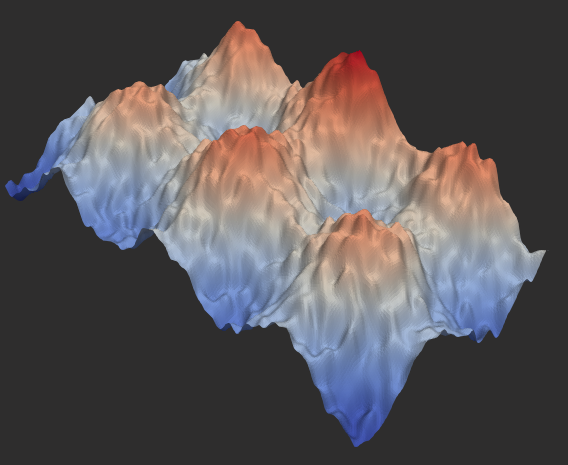

Persitence Curve

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve1 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve1', Input=elevation1)
tTKPersistenceCurve1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
clip1 = FindSource('Clip1')

# set active source
SetActiveSource(tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

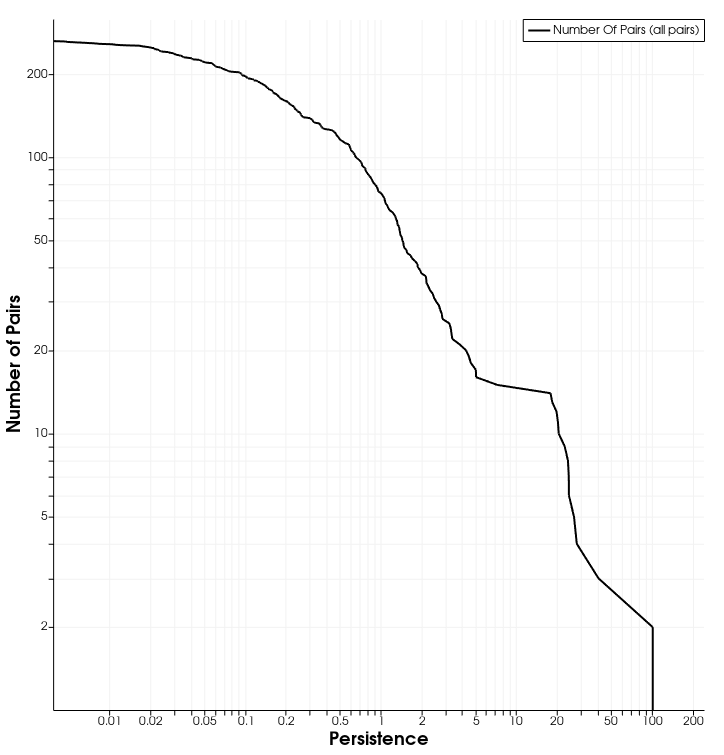

Persistence Points with persistence threshold = 10

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# set active source
SetActiveSource(elevation1)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram1 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram1', Input=elevation1)
tTKPersistenceDiagram1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram1.InputOffsetField = ['POINTS', 'Elevation']

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram1)

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
clip1 = FindSource('Clip1')

# create a new 'Threshold'
threshold1 = Threshold(registrationName='Threshold1', Input=tTKPersistenceDiagram1)
threshold1.Scalars = ['POINTS', 'CriticalType']
threshold1.UpperThreshold = 3.0

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'PairIdentifier']
threshold1.LowerThreshold = -1.0
threshold1.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold1)

# create a new 'Extract Surface'
extractSurface1 = ExtractSurface(registrationName='ExtractSurface1', Input=threshold1)

UpdatePipeline(time=0.0, proxy=extractSurface1)

# create a new 'Tube'
tube1 = Tube(registrationName='Tube1', Input=extractSurface1)
tube1.Scalars = ['POINTS', 'CriticalType']
tube1.Vectors = ['POINTS', 'Coordinates']
tube1.Radius = 0.9680215454101563

UpdatePipeline(time=0.0, proxy=tube1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram1)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.UpperThreshold = 264.0

UpdatePipeline(time=0.0, proxy=threshold2)

RenameProxy('PersistencePairs', 'sources', threshold2)

# rename source object
RenameSource('PersistencePairs', threshold2)

# create a new 'Threshold'
threshold2_1 = Threshold(registrationName='Threshold2', Input=threshold2)
threshold2_1.Scalars = ['POINTS', 'CriticalType']
threshold2_1.UpperThreshold = 3.0

# Properties modified on threshold2_1
threshold2_1.Scalars = ['CELLS', 'Persistence']
threshold2_1.LowerThreshold = 10.0
threshold2_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold2_1)

RenameProxy('PersistenceThreshold', 'sources', threshold2_1)

# rename source object
RenameSource('PersistenceThreshold', threshold2_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints1 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints1', Input=threshold2_1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 2.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints1)

# set active source
SetActiveSource(threshold2_1)

# create a new 'Extract Surface'
extractSurface2 = ExtractSurface(registrationName='ExtractSurface2', Input=threshold2_1)

UpdatePipeline(time=0.0, proxy=extractSurface2)

# create a new 'Tube'
tube2 = Tube(registrationName='Tube2', Input=extractSurface2)
tube2.Scalars = ['POINTS', 'CriticalType']
tube2.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube2)

# set active source
SetActiveSource(elevation1)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification1 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification1', Domain=elevation1,
    Constraints=threshold2_1)
tTKTopologicalSimplification1.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints1 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints1', Input=tTKTopologicalSimplification1)
tTKScalarFieldCriticalPoints1.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints2 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints2', Input=tTKScalarFieldCriticalPoints1)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.0125

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.025

# set active source
SetActiveSource(tTKTopologicalSimplification1)

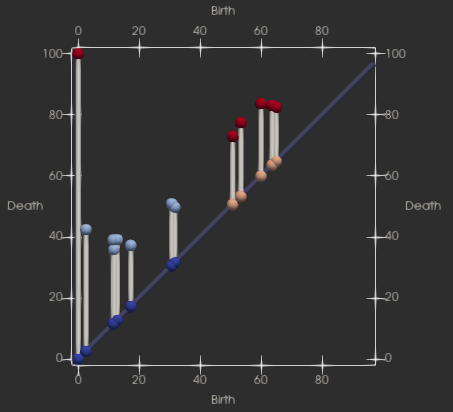

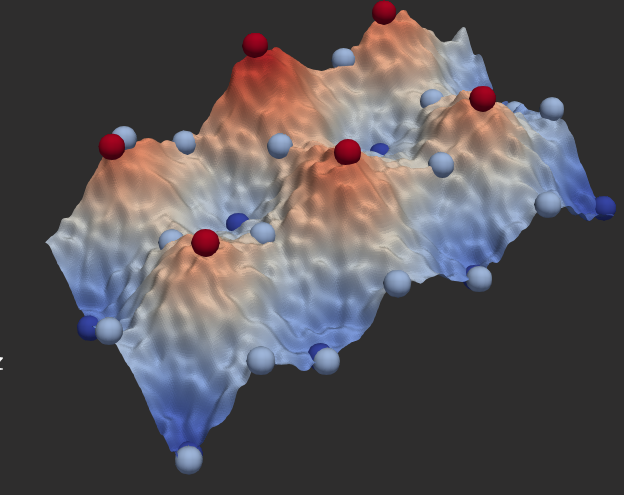

### 2nd sub-division (one-fourth)

In [ ]:
# create a new 'XML Unstructured Grid Reader'
noisyTerrainvtu = XMLUnstructuredGridReader(registrationName='noisyTerrain.vtu', FileName="""'C:\\Users\
atha\\ttk\\ttk-data-1.0.0\
oisyTerrain.vtu'""")
noisyTerrainvtu.PointArrayStatus = ['TextureCoordinates', 'RandomPointScalars', 'Sine', 'DistanceField', 'Blend']

# Properties modified on noisyTerrainvtu
noisyTerrainvtu.PointArrayStatus = []
noisyTerrainvtu.TimeArray = 'None'

UpdatePipeline(time=0.0, proxy=noisyTerrainvtu)

# create a new 'Clip'
clip1 = Clip(registrationName='Clip1', Input=noisyTerrainvtu)
clip1.ClipType = 'Plane'
clip1.HyperTreeGridClipper = 'Plane'
clip1.Scalars = [None, '']

# init the 'Plane' selected for 'ClipType'
clip1.ClipType.Origin = [0.0, 0.0, 0.0301545187830925]

# init the 'Plane' selected for 'HyperTreeGridClipper'
clip1.HyperTreeGridClipper.Origin = [0.0, 0.0, 0.0301545187830925]

# toggle 3D widget visibility (only when running from the GUI)
Show3DWidgets(proxy=clip1.ClipType)

# Properties modified on clip1
clip1.ClipType = 'Box'
clip1.Scalars = ['POINTS', '']

# Properties modified on clip1.ClipType
clip1.ClipType.Length = [0.5, 0.5, 0.3931908756494522]

UpdatePipeline(time=0.0, proxy=clip1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=clip1.ClipType)

# create a new 'Tetrahedralize'
tetrahedralize1 = Tetrahedralize(registrationName='Tetrahedralize1', Input=clip1)

UpdatePipeline(time=0.0, proxy=tetrahedralize1)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother1 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother1', Input=tetrahedralize1)
tTKGeometrySmoother1.InputMaskField = [None, '']

# Properties modified on tTKGeometrySmoother1
tTKGeometrySmoother1.IterationNumber = 3
tTKGeometrySmoother1.InputMaskField = ['POINTS', '']

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother1)

# create a new 'Elevation'
elevation1 = Elevation(registrationName='Elevation1', Input=tTKGeometrySmoother1)
elevation1.LowPoint = [-0.4975585639476776, -0.49755859375, -0.15269559621810913]
elevation1.HighPoint = [-0.00244142091833055, -0.002441421151161194, 0.22494705021381378]

# Properties modified on elevation1
elevation1.ScalarRange = [0.0, 100.0]
elevation1.LowPoint = [-0.24999999243300408, -0.2500000074505806, -0.15269559621810913]
elevation1.HighPoint = [-0.24999999243300408, -0.2500000074505806, 0.22494705021381378]

UpdatePipeline(time=0.0, proxy=elevation1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation1)

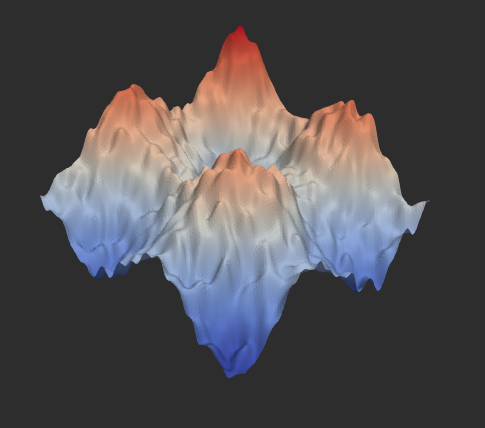

Persitence Curve

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve1 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve1', Input=elevation1)
tTKPersistenceCurve1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
clip1 = FindSource('Clip1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

# set active source
SetActiveSource(tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

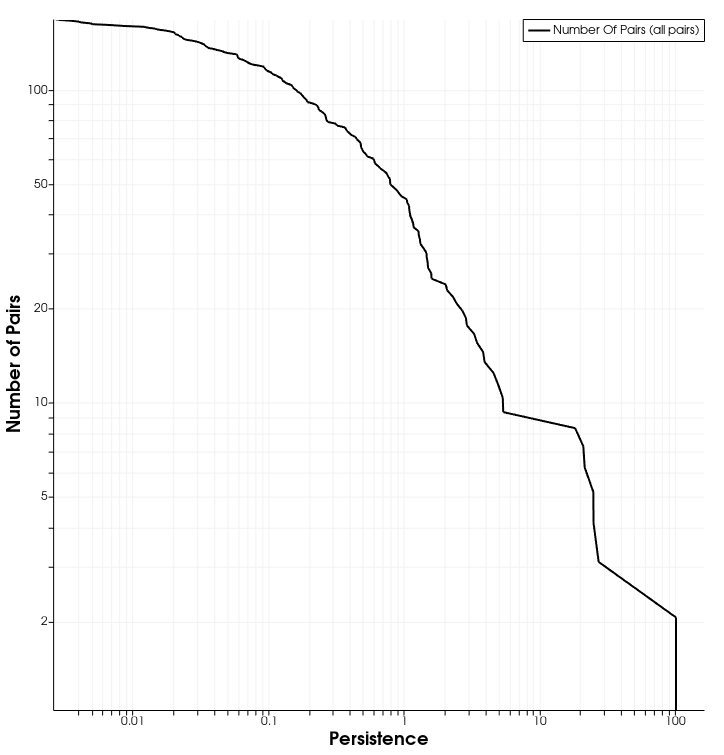

Persistence Points with persistence threshold = 10

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# set active source
SetActiveSource(elevation1)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram1 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram1', Input=elevation1)
tTKPersistenceDiagram1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
clip1 = FindSource('Clip1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold1 = Threshold(registrationName='Threshold1', Input=tTKPersistenceDiagram1)
threshold1.Scalars = ['POINTS', 'CriticalType']
threshold1.UpperThreshold = 3.0

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'PairIdentifier']
threshold1.LowerThreshold = -1.0
threshold1.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold1)

# create a new 'Extract Surface'
extractSurface1 = ExtractSurface(registrationName='ExtractSurface1', Input=threshold1)

UpdatePipeline(time=0.0, proxy=extractSurface1)

# create a new 'Tube'
tube1 = Tube(registrationName='Tube1', Input=extractSurface1)
tube1.Scalars = ['POINTS', 'CriticalType']
tube1.Vectors = ['POINTS', 'Coordinates']
tube1.Radius = 0.9670252227783204

UpdatePipeline(time=0.0, proxy=tube1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram1)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.UpperThreshold = 161.0

UpdatePipeline(time=0.0, proxy=threshold2)

RenameProxy('PersitencePairs', 'sources', threshold2)

# rename source object
RenameSource('PersitencePairs', threshold2)

# create a new 'Threshold'
threshold2_1 = Threshold(registrationName='Threshold2', Input=threshold2)
threshold2_1.Scalars = ['POINTS', 'CriticalType']
threshold2_1.UpperThreshold = 3.0

# Properties modified on threshold2_1
threshold2_1.Scalars = ['CELLS', 'Persistence']
threshold2_1.LowerThreshold = 10.0
threshold2_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold2_1)

RenameProxy('PersistenceThreshold', 'sources', threshold2_1)

# rename source object
RenameSource('PersistenceThreshold', threshold2_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints1 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints1', Input=threshold2_1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 2.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints1)

# set active source
SetActiveSource(threshold2)

# set active source
SetActiveSource(threshold2_1)

# create a new 'Extract Surface'
extractSurface2 = ExtractSurface(registrationName='ExtractSurface2', Input=threshold2_1)

UpdatePipeline(time=0.0, proxy=extractSurface2)

# create a new 'Tube'
tube2 = Tube(registrationName='Tube2', Input=extractSurface2)
tube2.Scalars = ['POINTS', 'CriticalType']
tube2.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube2)

# set active source
SetActiveSource(elevation1)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification1 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification1', Domain=elevation1,
    Constraints=threshold2_1)
tTKTopologicalSimplification1.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints1 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints1', Input=tTKTopologicalSimplification1)
tTKScalarFieldCriticalPoints1.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints2 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints2', Input=tTKScalarFieldCriticalPoints1)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.025

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints2)

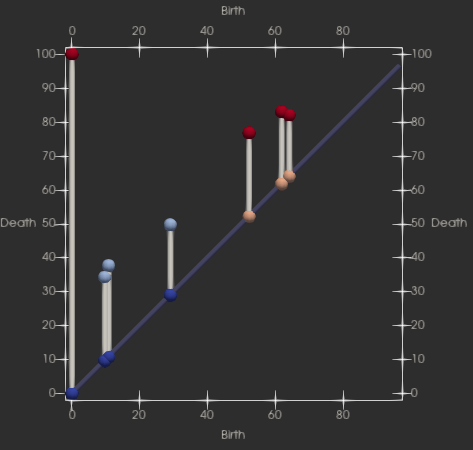

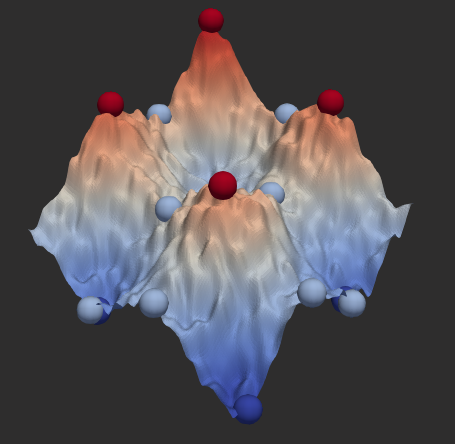

### 3rd sub-division (Center Peak)

In [ ]:
# create a new 'XML Unstructured Grid Reader'
noisyTerrainvtu = XMLUnstructuredGridReader(registrationName='noisyTerrain.vtu', FileName="""'C:\\Users\
atha\\ttk\\ttk-data-1.0.0\
oisyTerrain.vtu'""")
noisyTerrainvtu.PointArrayStatus = ['TextureCoordinates', 'RandomPointScalars', 'Sine', 'DistanceField', 'Blend']

# Properties modified on noisyTerrainvtu
noisyTerrainvtu.PointArrayStatus = []
noisyTerrainvtu.TimeArray = 'None'

UpdatePipeline(time=0.0, proxy=noisyTerrainvtu)

# create a new 'Clip'
clip1 = Clip(registrationName='Clip1', Input=noisyTerrainvtu)
clip1.ClipType = 'Plane'
clip1.HyperTreeGridClipper = 'Plane'
clip1.Scalars = [None, '']

# init the 'Plane' selected for 'ClipType'
clip1.ClipType.Origin = [0.0, 0.0, 0.0301545187830925]

# init the 'Plane' selected for 'HyperTreeGridClipper'
clip1.HyperTreeGridClipper.Origin = [0.0, 0.0, 0.0301545187830925]

# toggle 3D widget visibility (only when running from the GUI)
Show3DWidgets(proxy=clip1.ClipType)

# toggle 3D widget visibility (only when running from the GUI)
Show3DWidgets(proxy=clip1.ClipType)

# Properties modified on clip1
clip1.ClipType = 'Cylinder'
clip1.Scalars = ['POINTS', '']

# Properties modified on clip1.ClipType
clip1.ClipType.Axis = [0.0, 0.0, 1.0]
clip1.ClipType.Radius = 0.2146341576833745

UpdatePipeline(time=0.0, proxy=clip1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=clip1.ClipType)

# create a new 'Tetrahedralize'
tetrahedralize1 = Tetrahedralize(registrationName='Tetrahedralize1', Input=clip1)

UpdatePipeline(time=0.0, proxy=tetrahedralize1)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother1 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother1', Input=tetrahedralize1)
tTKGeometrySmoother1.InputMaskField = [None, '']

# Properties modified on tTKGeometrySmoother1
tTKGeometrySmoother1.IterationNumber = 3
tTKGeometrySmoother1.InputMaskField = ['POINTS', '']

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother1)

# create a new 'Elevation'
elevation1 = Elevation(registrationName='Elevation1', Input=tTKGeometrySmoother1)
elevation1.LowPoint = [-0.21322469413280487, -0.2132236808538437, -0.05089074373245239]
elevation1.HighPoint = [0.21322469413280487, 0.2132236808538437, 0.22268424928188324]

# Properties modified on elevation1
elevation1.ScalarRange = [0.0, 100.0]
elevation1.LowPoint = [0.0, 0.0, -0.05089074373245239]
elevation1.HighPoint = [0.0, 0.0, 0.22268424928188324]

UpdatePipeline(time=0.0, proxy=elevation1)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation1)

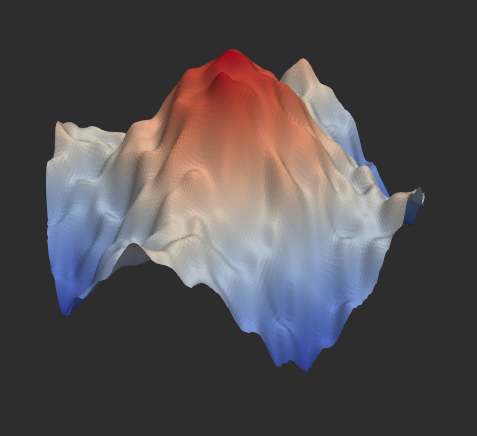

Persitence Curve

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve1 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve1', Input=elevation1)
tTKPersistenceCurve1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

# find source
clip1 = FindSource('Clip1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# set active source
SetActiveSource(tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

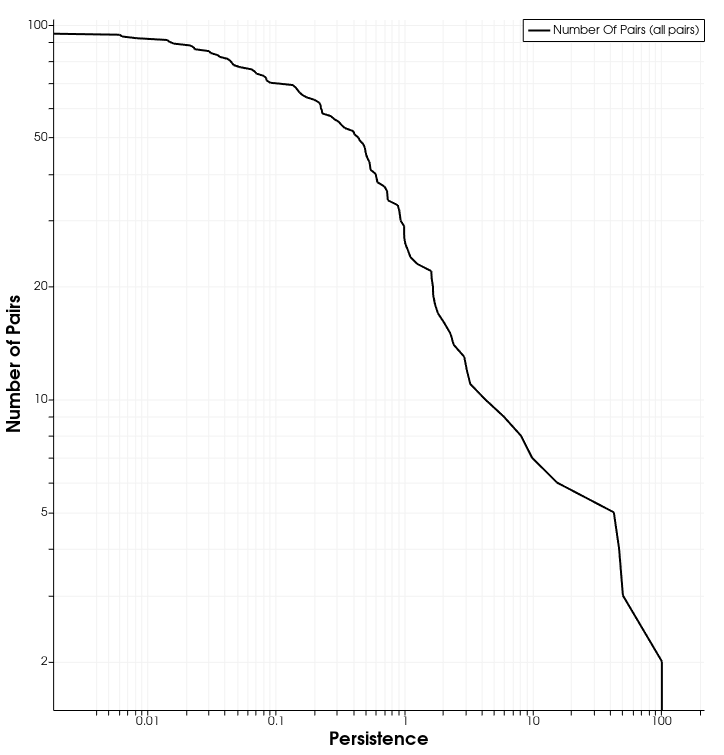

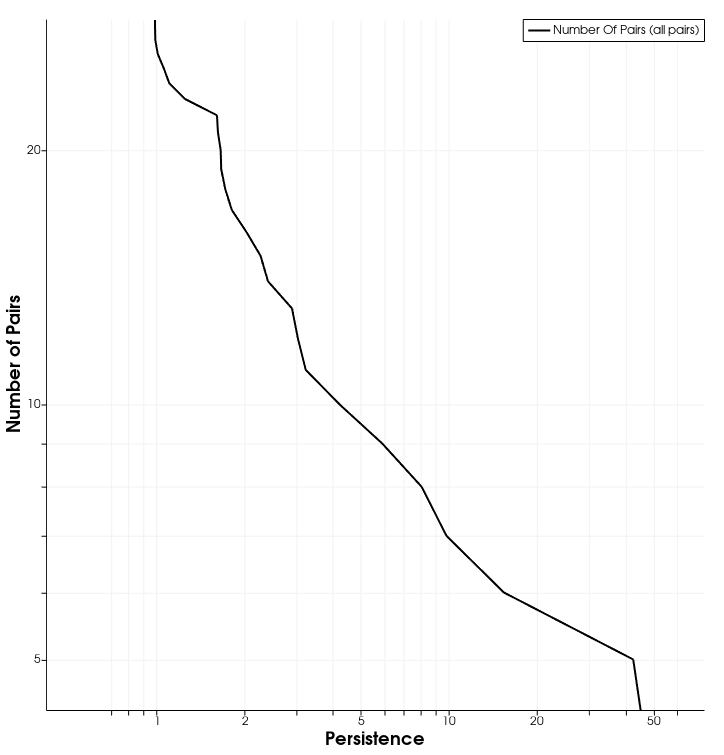

Persistence Points with persistence threshold = 1.5

In [ ]:
# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# set active source
SetActiveSource(tTKPersistenceCurve1)

# find source
elevation1 = FindSource('Elevation1')

# set active source
SetActiveSource(elevation1)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram1 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram1', Input=elevation1)
tTKPersistenceDiagram1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram1.InputOffsetField = ['POINTS', 'Elevation']

# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
clip1 = FindSource('Clip1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold1 = Threshold(registrationName='Threshold1', Input=tTKPersistenceDiagram1)
threshold1.Scalars = ['POINTS', 'CriticalType']
threshold1.UpperThreshold = 3.0

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'PairIdentifier']
threshold1.LowerThreshold = -1.0
threshold1.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold1)

# create a new 'Extract Surface'
extractSurface1 = ExtractSurface(registrationName='ExtractSurface1', Input=threshold1)

UpdatePipeline(time=0.0, proxy=extractSurface1)

# create a new 'Tube'
tube1 = Tube(registrationName='Tube1', Input=extractSurface1)
tube1.Scalars = ['POINTS', 'CriticalType']
tube1.Vectors = ['POINTS', 'Coordinates']
tube1.Radius = 0.9628710174560547

UpdatePipeline(time=0.0, proxy=tube1)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram1)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.UpperThreshold = 93.0

UpdatePipeline(time=0.0, proxy=threshold2)

RenameProxy('PersistencePairs', 'sources', threshold2)

# rename source object
RenameSource('PersistencePairs', threshold2)

# create a new 'Threshold'
threshold2_1 = Threshold(registrationName='Threshold2', Input=threshold2)
threshold2_1.Scalars = ['POINTS', 'CriticalType']
threshold2_1.UpperThreshold = 3.0

# Properties modified on threshold2_1
threshold2_1.Scalars = ['CELLS', 'Persistence']
threshold2_1.LowerThreshold = 1.5
threshold2_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold2_1)

RenameProxy('PersistenceThreshold', 'sources', threshold2_1)

# rename source object
RenameSource('PersistenceThreshold', threshold2_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints1 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints1', Input=threshold2_1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 2.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 1.5

# set active source
SetActiveSource(threshold2_1)

# create a new 'Extract Surface'
extractSurface2 = ExtractSurface(registrationName='ExtractSurface2', Input=threshold2_1)

UpdatePipeline(time=0.0, proxy=extractSurface2)

# create a new 'Tube'
tube2 = Tube(registrationName='Tube2', Input=extractSurface2)
tube2.Scalars = ['POINTS', 'CriticalType']
tube2.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube2)

# Properties modified on tube2
tube2.Radius = 0.84

# set active source
SetActiveSource(elevation1)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification1 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification1', Domain=elevation1,
    Constraints=threshold2_1)
tTKTopologicalSimplification1.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints1 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints1', Input=tTKTopologicalSimplification1)
tTKScalarFieldCriticalPoints1.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints2 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints2', Input=tTKScalarFieldCriticalPoints1)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.025

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.0125

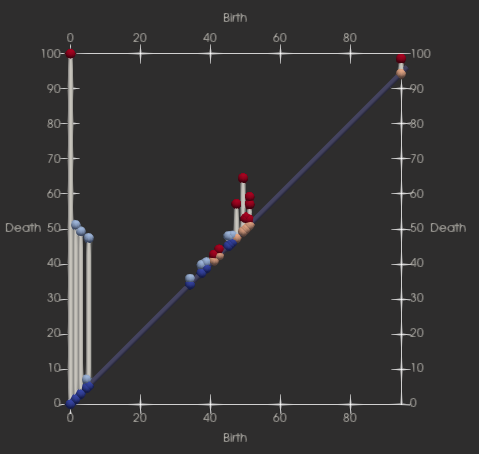

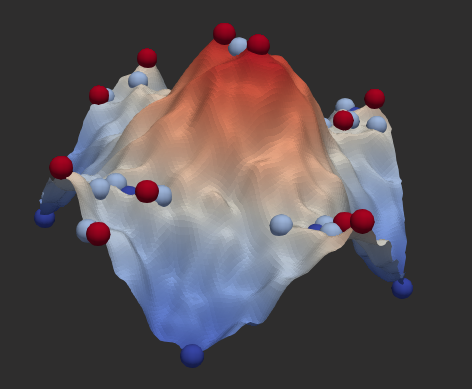

Persistence Points with persistence threshold = 20

In [ ]:
# find source
noisyTerrainvtu = FindSource('noisyTerrain.vtu')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
clip1 = FindSource('Clip1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
elevation1 = FindSource('Elevation1')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# find source
persistencePairs = FindSource('PersistencePairs')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tube1 = FindSource('Tube1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# get active source.
persistenceThreshold = GetActiveSource()

# Properties modified on persistenceThreshold
persistenceThreshold.LowerThreshold = 20.0

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# set active source
SetActiveSource(tTKIcospheresFromPoints1)

# set active source
SetActiveSource(tube2)

# set active source
SetActiveSource(tube1)

# set active source
SetActiveSource(persistenceThreshold)

# set active source
SetActiveSource(tTKIcospheresFromPoints1)

# set active source
SetActiveSource(tube2)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(extractSurface1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# set active source
SetActiveSource(persistenceThreshold)

# set active source
SetActiveSource(tTKIcospheresFromPoints1)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(extractSurface2)

# set active source
SetActiveSource(tube2)

# set active source
SetActiveSource(tTKTopologicalSimplification1)

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# set active source
SetActiveSource(tube1)

# set active source
SetActiveSource(persistenceThreshold)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# set active source
SetActiveSource(tTKIcospheresFromPoints2)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 0.02

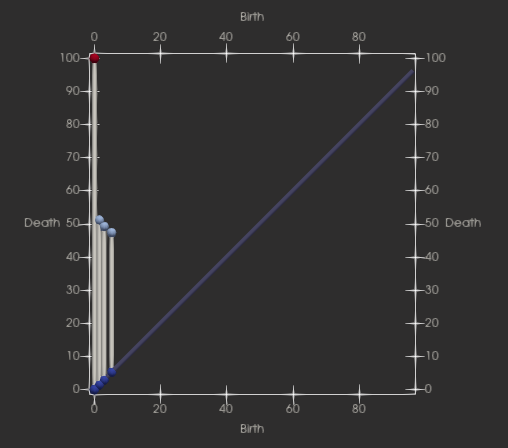

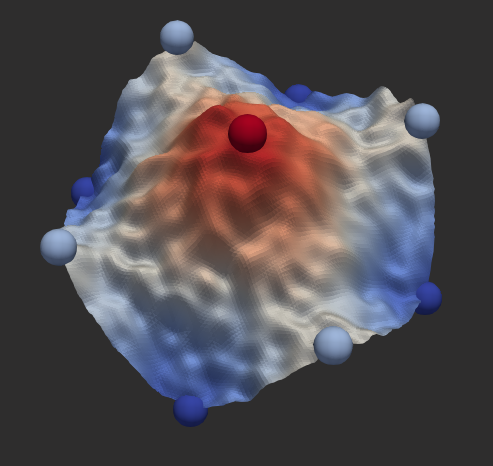